In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from pandas.tools.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA, ARMAResults
import datetime
import sys
import seaborn as sns
import statsmodels
import statsmodels.stats.diagnostic as diag
from statsmodels.tsa.stattools import adfuller
from scipy.stats.mstats import normaltest
from matplotlib.pyplot import acorr
plt.style.use('fivethirtyeight')
%matplotlib inline

In [7]:
data = pd.read_csv('/content/drive/MyDrive/ML_Assignments/data_stocks.csv')
data.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [8]:
data['DATE'] = pd.to_datetime(data['DATE'])

In [9]:
data['DATE'].dtype

dtype('<M8[ns]')

In [10]:
data = data[['DATE','NASDAQ.AAPL','NASDAQ.ADP','NASDAQ.CBOE','NASDAQ.CSCO','NASDAQ.EBAY']].copy()

In [11]:
data.head()

,DATE,NASDAQ.AAPL,NASDAQ.ADP,NASDAQ.CBOE,NASDAQ.CSCO,NASDAQ.EBAY
0,1970-01-01 00:00:01.491226200,143.6800,102.2300,81.03,33.7400,33.3975
1,1970-01-01 00:00:01.491226260,143.7000,102.1400,81.21,33.8800,33.3950
2,1970-01-01 00:00:01.491226320,143.6901,102.2125,81.21,33.9000,33.4100
3,1970-01-01 00:00:01.491226380,143.6400,102.1400,81.13,33.8499,33.3350
4,1970-01-01 00:00:01.491226440,143.6600,102.0600,81.12,33.8400,33.4000


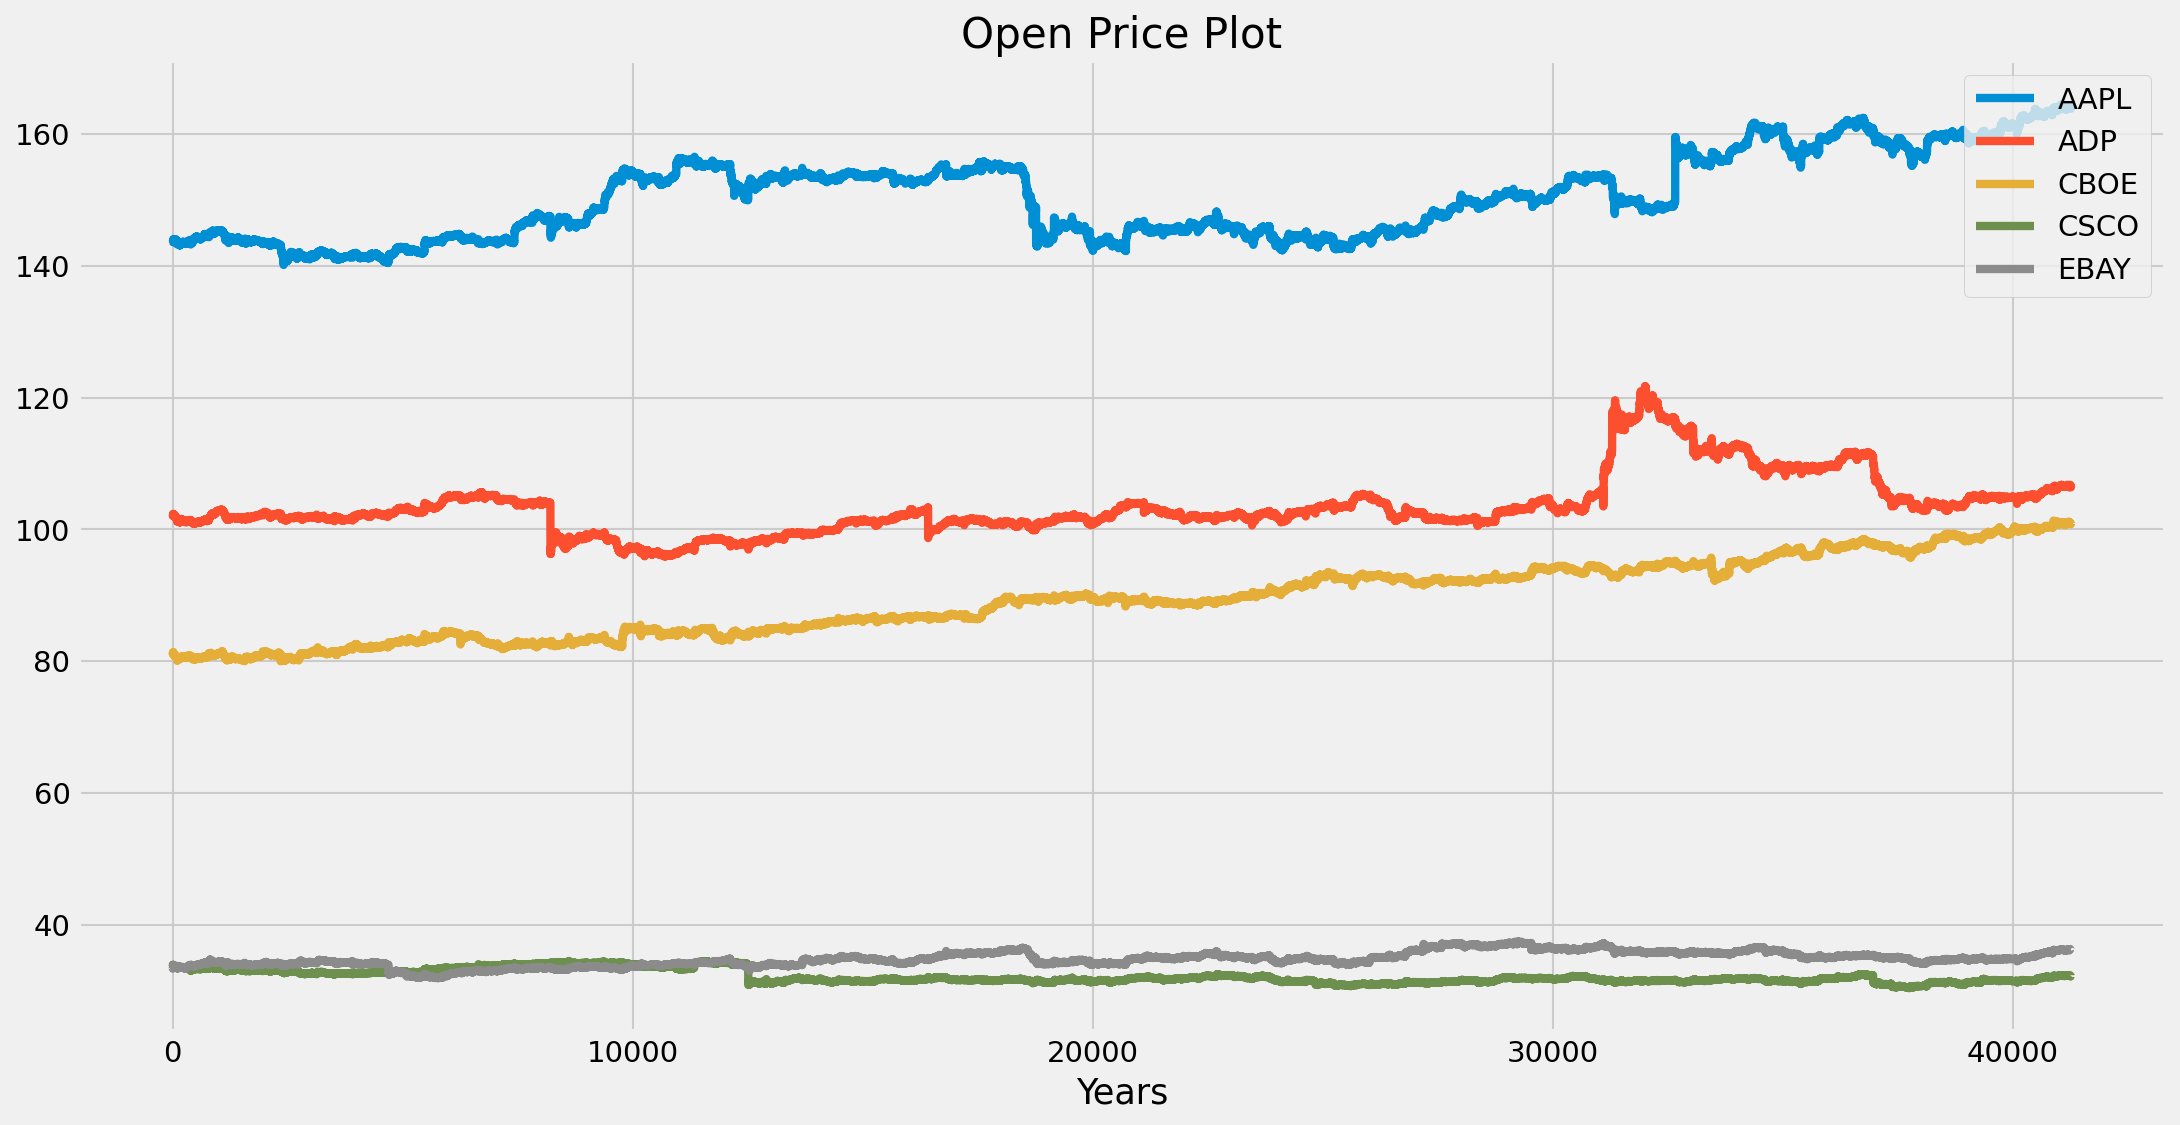

In [34]:

# code
# Visualizing The Open Price of all the stocks

# to set the plot size
plt.figure(figsize=(16, 8), dpi=150)

# using plot method to plot open prices.
# in plot method we set the label and color of the curve.
data['NASDAQ.AAPL'].plot(label='AAPL')
data['NASDAQ.ADP'].plot(label='ADP')
data['NASDAQ.CBOE'].plot(label='CBOE')
data['NASDAQ.CSCO'].plot(label='CSCO')
data['NASDAQ.EBAY'].plot(label='EBAY')
# adding title to the plot
plt.title('Open Price Plot')

# adding Label to the x-axis
plt.xlabel('Years')

# adding legend to the curve
plt.legend()

<Figure size 3000x1500 with 0 Axes>

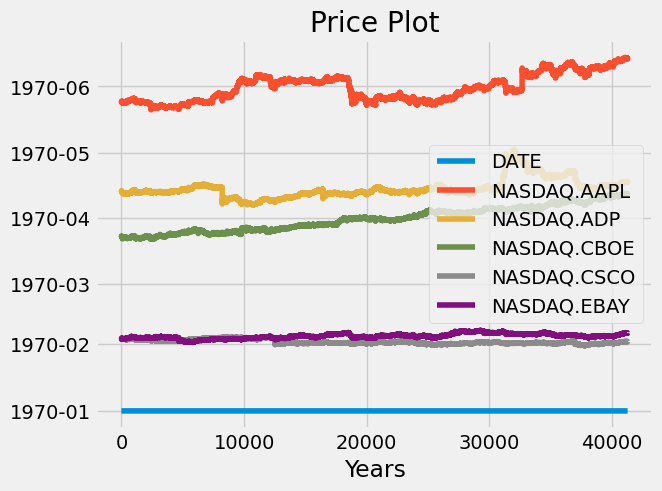

In [37]:
# Visualizing The Price of the stocks
# to set the plot size
plt.figure(figsize=(20, 10), dpi=150)

# using .plot method to plot stock prices.
# we have passed colors as a list
data.plot(label='data')

# adding title
plt.title('Price Plot')

# adding label to x-axis
plt.xlabel('Years')

# adding legend.
plt.legend()

In [12]:
import plotly.express as px
# df = px.data.stocks()
fig = px.line(data, x="DATE", y=['NASDAQ.AAPL','NASDAQ.ADP','NASDAQ.CBOE','NASDAQ.CSCO','NASDAQ.EBAY'],
              hover_data={"DATE": "|%B %d, %Y"},
              title='custom tick labels')
fig.update_xaxes(
    dtick="M1",
    tickformat="%b\n%Y")
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [13]:
data_one = data[['DATE','NASDAQ.AAPL']]

In [27]:
#Test for staionarity
def test_stationarity(timeseries):
    # Determing rolling statistics
    rolmean = timeseries.rolling(48).mean() # rolling mean
    rolstd = timeseries.rolling(48).std() # rolling standard deviation
    # Plot rolling statistics:
    plt.figure(figsize = (18,8))
    plt.grid('both')
    plt.plot(timeseries, color='blue',label='Original', linewidth = 3)
    plt.plot(rolmean, color='red', label='Rolling Mean',linewidth = 3)
    plt.plot(rolstd, color='black', label = 'Rolling Std',linewidth = 4)
    plt.legend(loc='best', fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
    plt.title('Rolling Mean and Standard Deviation', fontsize = 25)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.show(block=False)

    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    # hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    if (adft[1] <= 0.05) & (adft[4]['5%'] > adft[0]):
        print("Time series is :" + "\u001b[32mStationary\u001b[0m")
    else:
        print("Time series is :" + "\x1b[31mNon-stationary\x1b[0m")
    print(output)

In [21]:
data_one_diff_1=data_one['NASDAQ.AAPL'].diff()
data_one_diff_1=data_one_diff_1.dropna()

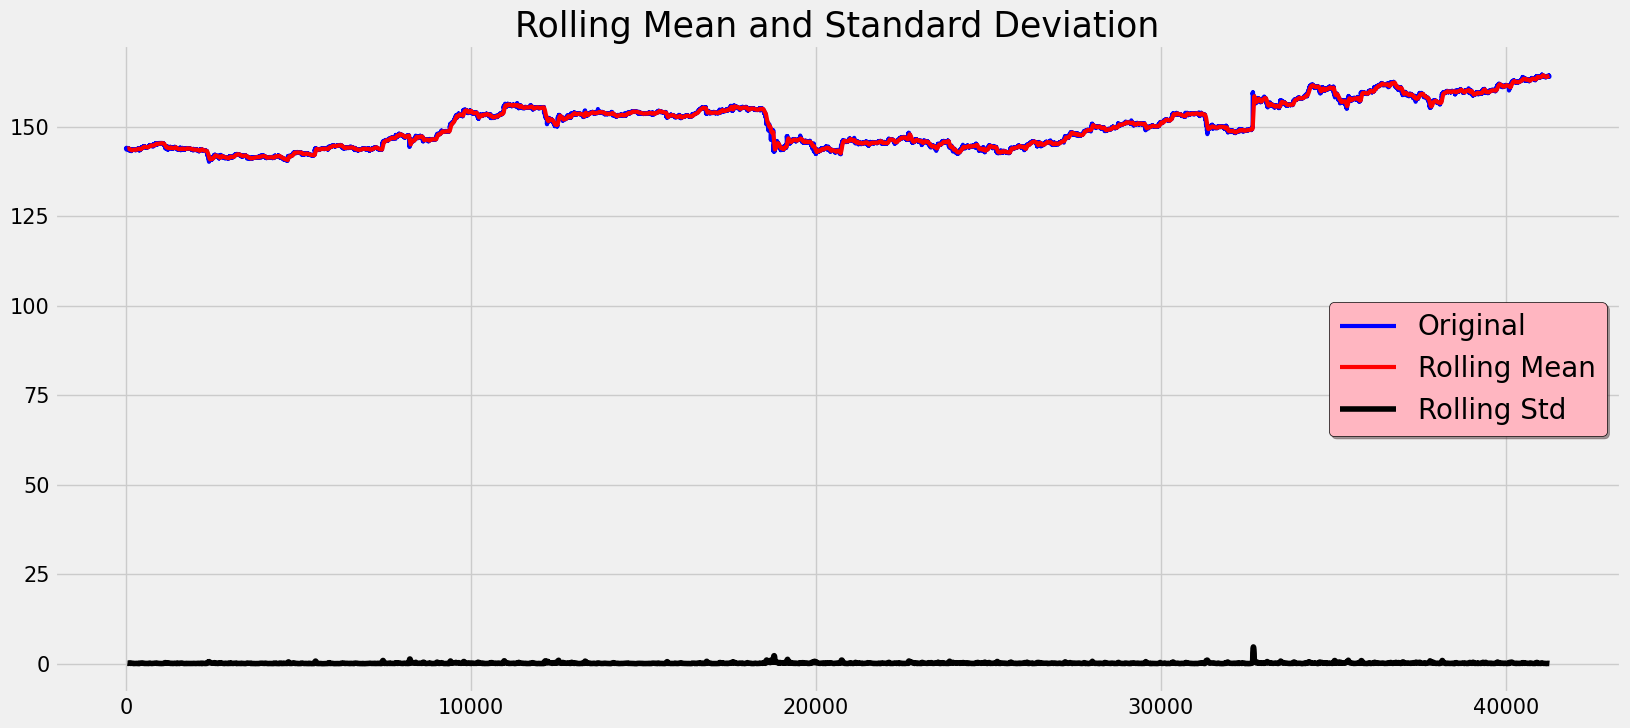

Results of dickey fuller test
Time series is :Non-stationary
Test Statistics                   -0.912853
p-value                            0.783710
No. of lags used                  31.000000
Number of observations used    41234.000000
critical value (1%)               -3.430509
critical value (5%)               -2.861610
critical value (10%)              -2.566807
dtype: float64


In [28]:
test_stationarity(data_one['NASDAQ.AAPL'])

In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose
result=seasonal_decompose(data_one['NASDAQ.AAPL'],model= "multiplicative",period=30)

<Figure size 2000x1000 with 0 Axes>

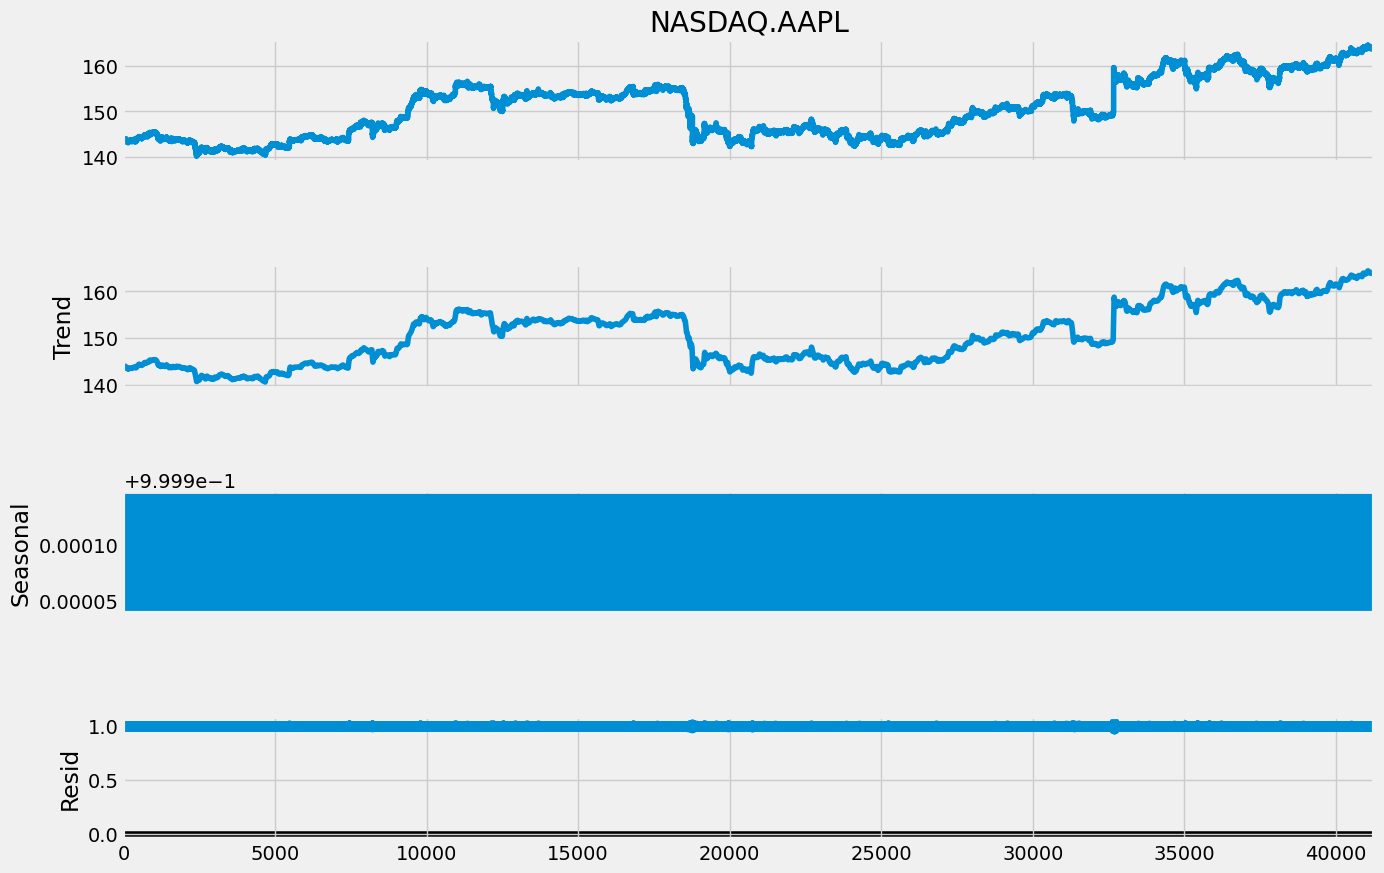

In [31]:
plt.figure(figsize=(20,10))
fig=result.plot()
fig.set_size_inches(17,10)

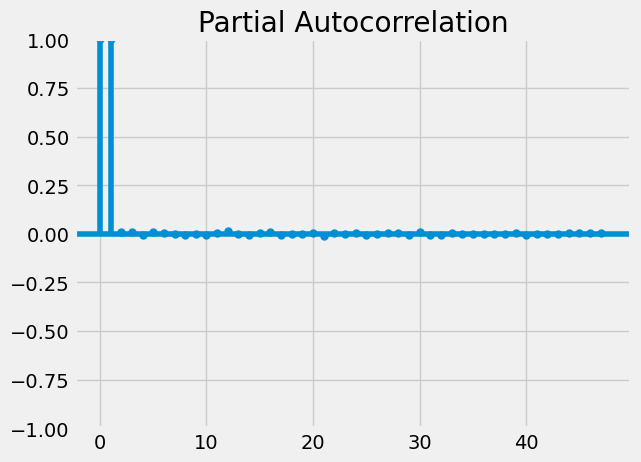

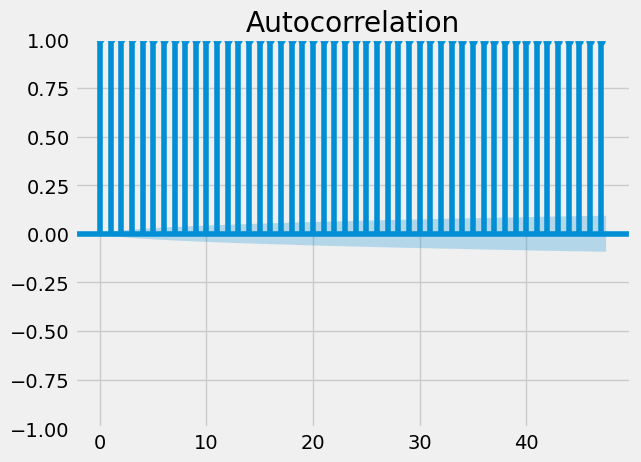

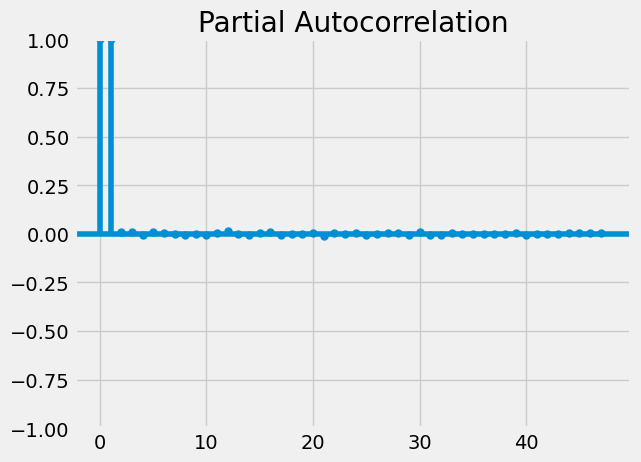

In [32]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(data_one['NASDAQ.AAPL'])
plot_pacf(data_one['NASDAQ.AAPL'])

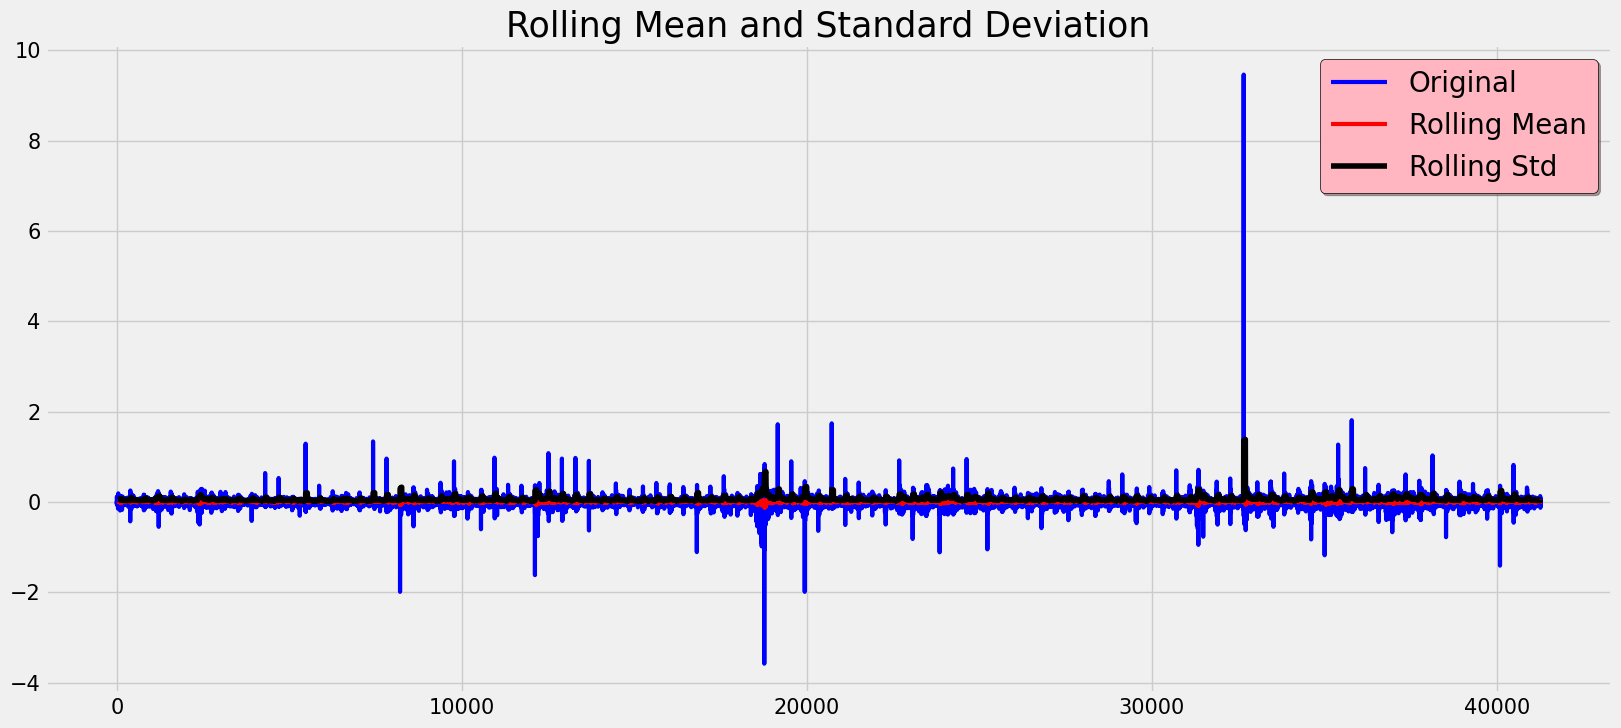

Results of dickey fuller test
Time series is :Stationary
Test Statistics                  -35.737741
p-value                            0.000000
No. of lags used                  30.000000
Number of observations used    41234.000000
critical value (1%)               -3.430509
critical value (5%)               -2.861610
critical value (10%)              -2.566807
dtype: float64


In [29]:
test_stationarity(data_one_diff_1)

In [33]:
data_one['NASDAQ.AAPL'].shape

(41266,)

In [69]:
train_data=data_one['NASDAQ.AAPL'][:-33013]
test_data=data_one['NASDAQ.AAPL'][-33013:]

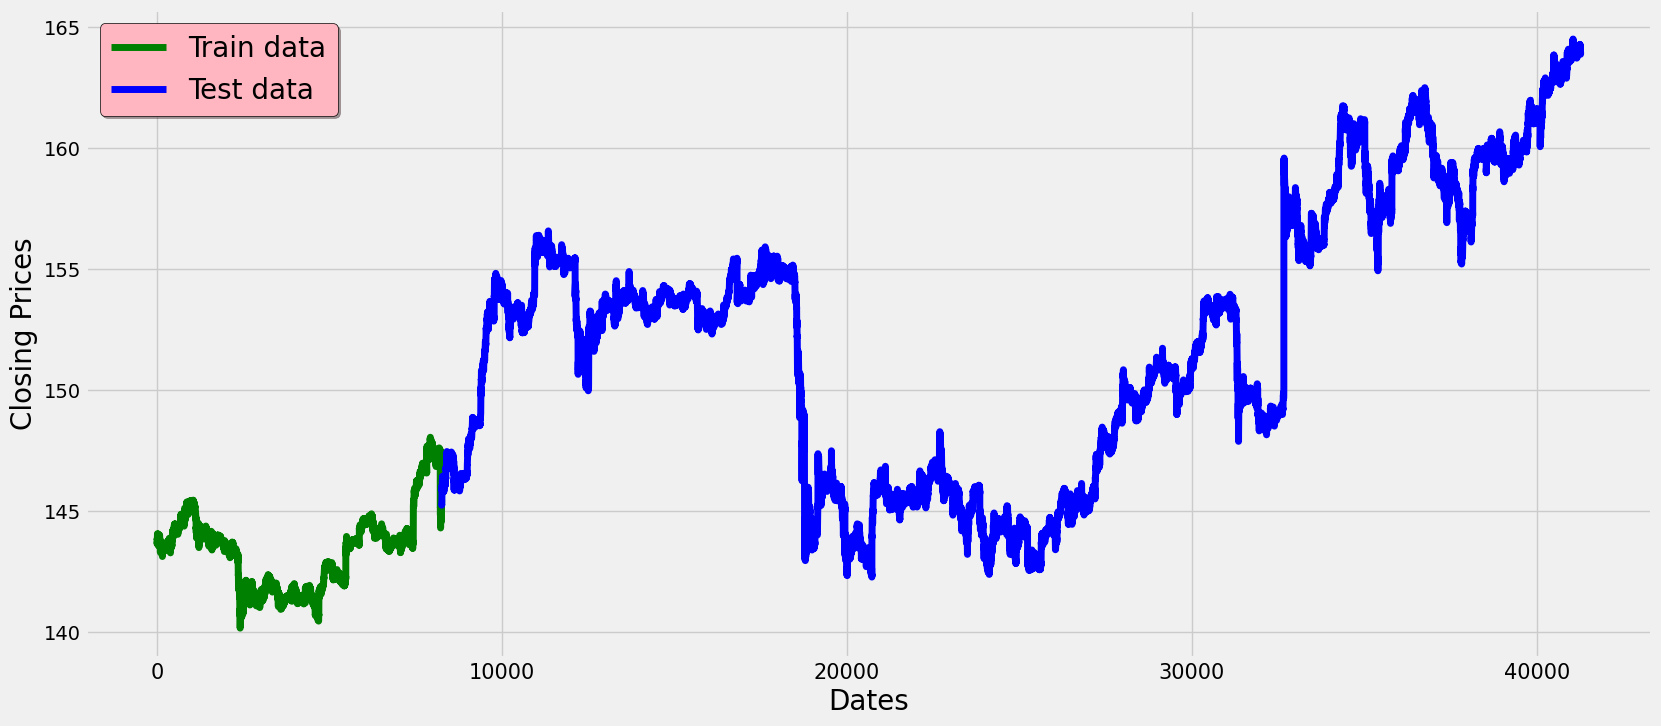

In [70]:
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel('Dates', fontsize = 20)
plt.ylabel('Closing Prices', fontsize = 20)
plt.xticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.plot(train_data, 'green', label='Train data', linewidth = 5)
plt.plot(test_data, 'blue', label='Test data', linewidth = 5)
plt.legend(fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')

In [71]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
history=[x for x in train_data]

In [108]:
model=ARIMA(history,order=(1,1,1))

In [109]:
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                19269
Model:                 ARIMA(1, 1, 1)   Log Likelihood               21536.192
Date:                Thu, 02 Nov 2023   AIC                         -43066.385
Time:                        11:12:55   BIC                         -43042.786
Sample:                             0   HQIC                        -43058.650
                              - 19269                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0032      0.434      0.007      0.994      -0.848       0.854
ma.L1          0.0032      0.434      0.007      0.994      -0.847       0.853
sigma2         0.0063    5.6e-06   1117.882      0.000       0.006       0.006
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):          68165381.48
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               3.24   Skew:                            -5.08
Prob(H) (two-sided):                  0.00   Kurtosis:                       294.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [110]:
model.forecast()

array([145.79116024])